### importing packagages

In [1]:
#import packages
import flopy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import pandas as pd
import numpy as np
import os
import csv
import pickle

#additional analysis tools
import flopy.utils.binaryfile as bf
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
np.set_printoptions(threshold=np.inf)

#jupyter specific--included to show plots in notebook
%matplotlib inline 

flopy is installed in /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/flopy


### Sets cell IDs

In [2]:
##new plotting script start
#print(HEAD_adv2w.keys())#nested dict, first key is the ensembles (1-10)
#print(HEAD_adv2w[3].keys())#if you access an ensemble, the keys become the stress period
#sp0-sp2799 #scen 2 and 9 had convergence issues so they didn't write to the pickles
#print(HEAD_adv2w[1]['sp1'])

##Setting up constant well IDs
MW1_id = (0,25,24) #cell ID of MW1
aqua_id = (2,29,37) #Cell ID of aguaseca community well
##Ag well and MW2 for base model and closer field
MW2_base_id = (0,37,12) 
ag_base_id = (0,38,12)
##Ag well and MW2 for reflection
MW2_reflect_id = (0,12,12) 
ag_reflect_id = (0,11,12)

### Get time series for baseline

In [3]:
# time_series_agp = {}

# for x in range(1,11): #creates a time series of head values for design p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacyp_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_agp[x] = headobj.get_ts(ag_base_id)

# time_series_agw = {}

# for x in range(1,11): #creates a time series of head values for design p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacyw_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_agw[x] = headobj.get_ts(ag_base_id)

# time_series_MW1_p = {}

# for x in range(1,11): #creates a time series of head values for design p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacyp_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_MW1_p[x] = headobj.get_ts(MW1_id)

# time_series_MW1_w = {}

# for x in range(1,11): #creates a time series of head values for design p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacyw_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_MW1_w[x] = headobj.get_ts(MW1_id)
    
# time_series_aqua_p = {}

# for x in range(1,11): #creates a time series of head values for design p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacyp_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_aqua_p[x] = headobj.get_ts(aqua_id)

# time_series_aqua_w = {}

# for x in range(1,11): #creates a time series of head values for design p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacyw_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_aqua_w[x] = headobj.get_ts(aqua_id)

### Create head plots for baseline

In [4]:
# #create plot of ag well for design p - reflection with pistachios
# plt.subplot(1, 1, 1)
# ax=plt.gca()
# ax.ticklabel_format(useOffset=False)
# plt.title("Head at Ag Well Design #1 Reflected Field, Growing Pistachios",fontweight='bold')
# plt.xlabel('time (years)',fontweight='bold')
# plt.ylabel('head (m)',fontweight='bold')
# for x in range(1,11):
#     if time_series_agp[x][1600,1]<=0: 
#         continue
#     else:    
#         plt.plot(time_series_agp[x][1400:, 0]/360, time_series_agp[x][1400:, 1],) 
# #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
# plt.show()

# #create plot of ag well for design w - reflection with wheat
# plt.subplot(1, 1, 1)
# ax=plt.gca()
# ax.ticklabel_format(useOffset=False)
# plt.title("Head at Ag Well, Design #1 Reflected Field, Growing Wheat",fontweight='bold')
# plt.xlabel('time (years)',fontweight='bold')
# plt.ylabel('head (m)',fontweight='bold')
# for x in range(1,11):
#     if time_series_agp[x][1600,1]<=0: 
#         continue
#     else:    
#         plt.plot(time_series_agw[x][1400:, 0]/360, time_series_agw[x][1400:, 1],) 
# #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
# plt.show()

# #create plot of MW1 for design p - reflection with pistachios
# plt.subplot(1, 1, 1)
# ax=plt.gca()
# ax.ticklabel_format(useOffset=False)
# plt.title("Head at MW1 Design #1 Reflected Field, Growing Pistachios",fontweight='bold')
# plt.xlabel('time (years)',fontweight='bold')
# plt.ylabel('head (m)',fontweight='bold')
# for x in range(1,11):
#     if time_series_MW1_p[x][1600,1]<=0: 
#         continue
#     else:    
#         plt.plot(time_series_MW1_p[x][1400:, 0]/360, time_series_MW1_p[x][1400:, 1],) 
# #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
# plt.show()

# #create plot of MW1 for design w - reflection with wheat
# plt.subplot(1, 1, 1)
# ax=plt.gca()
# ax.ticklabel_format(useOffset=False)
# plt.title("Head at MW1, Design #1 Reflected Field, Growing Wheat",fontweight='bold')
# plt.xlabel('time (years)',fontweight='bold')
# plt.ylabel('head (m)',fontweight='bold')
# for x in range(1,11):
#     if time_series_MW1_w[x][1600,1]<=0: 
#         continue
#     else:    
#         plt.plot(time_series_MW1_w[x][1400:, 0]/360, time_series_MW1_w[x][1400:, 1],) 
# #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
# plt.show()

# #create plot of AQUA WELL for design p - reflection with pistachios
# plt.subplot(1, 1, 1)
# ax=plt.gca()
# ax.ticklabel_format(useOffset=False)
# plt.title("Head at Aquaseca Design #1 Reflected Field, Growing Pistachios",fontweight='bold')
# plt.xlabel('time (years)',fontweight='bold')
# plt.ylabel('head (m)',fontweight='bold')
# for x in range(1,11):
#     if time_series_aqua_p[x][1600,1]<=0: 
#         continue
#     else:    
#         plt.plot(time_series_aqua_p[x][1400:, 0]/360, time_series_aqua_p[x][1400:, 1],) 
# #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
# plt.show()

# #create plot of AQUA WELL for design w - reflection with wheat
# plt.subplot(1, 1, 1)
# ax=plt.gca()
# ax.ticklabel_format(useOffset=False)
# plt.title("Head at Aquaseca, Design #1 Reflected Field, Growing Wheat",fontweight='bold')
# plt.xlabel('time (years)',fontweight='bold')
# plt.ylabel('head (m)',fontweight='bold')
# for x in range(1,11):
#     if time_series_aqua_w[x][1600,1]<=0: 
#         continue
#     else:    
#         plt.plot(time_series_aqua_w[x][1400:, 0]/360, time_series_aqua_w[x][1400:, 1],) 
# #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
# plt.show()



### Get time series for reflection with wheat and pistachio design

In [5]:
# time_series_ag1p = {}

# for x in range(1,11): #creates a time series of head values for design 1p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacy1p_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_ag1p[x] = headobj.get_ts(ag_reflect_id)

# time_series_ag1w = {}

# for x in range(1,11): #creates a time series of head values for design 1p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacy1w_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_ag1w[x] = headobj.get_ts(ag_reflect_id)

# time_series_MW1_1p = {}

# for x in range(1,11): #creates a time series of head values for design 1p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacy1p_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_MW1_1p[x] = headobj.get_ts(MW1_id)

# time_series_MW1_1w = {}

# for x in range(1,11): #creates a time series of head values for design 1p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacy1w_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_MW1_1w[x] = headobj.get_ts(MW1_id)
    
# time_series_aqua_1p = {}

# for x in range(1,11): #creates a time series of head values for design 1p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacy1p_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_aqua_1p[x] = headobj.get_ts(aqua_id)

# time_series_aqua_1w = {}

# for x in range(1,11): #creates a time series of head values for design 1p (reflection, pistachios) all 10 ensembles
#     modelname = 'Advocacy1w_'+ str(x)
#     headobj = bf.HeadFile(modelname + '.hds')
#     time_series_aqua_1w[x] = headobj.get_ts(aqua_id)

## Creating the head plots

In [6]:
#     #create plot of ag well for design 1p - reflection with pistachios
#     plt.subplot(1, 1, 1)
#     ax=plt.gca()
#     ax.ticklabel_format(useOffset=False)
#     plt.title("Head at Ag Well Design #1 Reflected Field, Growing Pistachios",fontweight='bold')
#     plt.xlabel('time (years)',fontweight='bold')
#     plt.ylabel('head (m)',fontweight='bold')
#     for x in range(1,11):
#         if time_series_ag1p[x][2000,1]<=0: 
#             continue
#         else:    
#             plt.plot(time_series_ag1p[x][1400:, 0]/360, time_series_ag1p[x][1400:, 1],) 
#     #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
#     plt.show()

#     #create plot of ag well for design 1w - reflection with wheat
#     plt.subplot(1, 1, 1)
#     ax=plt.gca()
#     ax.ticklabel_format(useOffset=False)
#     plt.title("Head at Ag Well, Design #1 Reflected Field, Growing Wheat",fontweight='bold')
#     plt.xlabel('time (years)',fontweight='bold')
#     plt.ylabel('head (m)',fontweight='bold')
#     for x in range(1,11):
#         if time_series_ag1p[x][2000,1]<=0: 
#             continue
#         else:    
#             plt.plot(time_series_ag1w[x][1400:, 0]/360, time_series_ag1w[x][1400:, 1],) 
#     #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
#     plt.show()
    
#     #create plot of MW1 for design 1p - reflection with pistachios
#     plt.subplot(1, 1, 1)
#     ax=plt.gca()
#     ax.ticklabel_format(useOffset=False)
#     plt.title("Head at MW1 Design #1 Reflected Field, Growing Pistachios",fontweight='bold')
#     plt.xlabel('time (years)',fontweight='bold')
#     plt.ylabel('head (m)',fontweight='bold')
#     for x in range(1,11):
#         if time_series_MW1_1p[x][2000,1]<=0: 
#             continue
#         else:    
#             plt.plot(time_series_MW1_1p[x][1400:, 0]/360, time_series_MW1_1p[x][1400:, 1],) 
#     #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
#     plt.show()

#     #create plot of MW1 for design 1w - reflection with wheat
#     plt.subplot(1, 1, 1)
#     ax=plt.gca()
#     ax.ticklabel_format(useOffset=False)
#     plt.title("Head at MW1, Design #1 Reflected Field, Growing Wheat",fontweight='bold')
#     plt.xlabel('time (years)',fontweight='bold')
#     plt.ylabel('head (m)',fontweight='bold')
#     for x in range(1,11):
#         if time_series_MW1_1w[x][2000,1]<=0: 
#             continue
#         else:    
#             plt.plot(time_series_MW1_1w[x][1400:, 0]/360, time_series_MW1_1w[x][1400:, 1],) 
#     #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
#     plt.show()
    
#     #create plot of AQUA WELL for design 1p - reflection with pistachios
#     plt.subplot(1, 1, 1)
#     ax=plt.gca()
#     ax.ticklabel_format(useOffset=False)
#     plt.title("Head at Aquaseca Design #1 Reflected Field, Growing Pistachios",fontweight='bold')
#     plt.xlabel('time (years)',fontweight='bold')
#     plt.ylabel('head (m)',fontweight='bold')
#     for x in range(1,11):
#         if time_series_aqua_1p[x][2000,1]<=0: 
#             continue
#         else:    
#             plt.plot(time_series_aqua_1p[x][1400:, 0]/360, time_series_aqua_1p[x][1400:, 1],) 
#     #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
#     plt.show()

#     #create plot of AQUA WELL for design 1w - reflection with wheat
#     plt.subplot(1, 1, 1)
#     ax=plt.gca()
#     ax.ticklabel_format(useOffset=False)
#     plt.title("Head at Aquaseca, Design #1 Reflected Field, Growing Wheat",fontweight='bold')
#     plt.xlabel('time (years)',fontweight='bold')
#     plt.ylabel('head (m)',fontweight='bold')
#     for x in range(1,11):
#         if time_series_aqua_1w[x][2000,1]<=0: 
#             continue
#         else:    
#             plt.plot(time_series_aqua_1w[x][1400:, 0]/360, time_series_aqua_1w[x][1400:, 1],) 
#     #plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
#     plt.show()


### Get time series for design 2 - field closer to recharge, away from gaining section of stream - with pistachio and wheat

In [7]:
time_series_ag2p = {}

for x in range(1,11): #creates a time series of head values for design 2p (reflection, pistachios) all 10 ensembles
    modelname = 'Advocacy2p_'+ str(x)
    headobj = bf.HeadFile(modelname + '.hds')
    time_series_ag2p[x] = headobj.get_ts(ag_base_id)

time_series_ag2w = {}

for x in range(1,11): #creates a time series of head values for design 2p (reflection, pistachios) all 10 ensembles
    modelname = 'Advocacy2w_'+ str(x)
    headobj = bf.HeadFile(modelname + '.hds')
    time_series_ag2w[x] = headobj.get_ts(ag_base_id)

time_series_MW1_2p = {}

for x in range(1,11): #creates a time series of head values for design 2p (reflection, pistachios) all 10 ensembles
    modelname = 'Advocacy2p_'+ str(x)
    headobj = bf.HeadFile(modelname + '.hds')
    time_series_MW1_2p[x] = headobj.get_ts(MW1_id)

time_series_MW1_2w = {}

for x in range(1,11): #creates a time series of head values for design 2p (reflection, pistachios) all 10 ensembles
    modelname = 'Advocacy2w_'+ str(x)
    headobj = bf.HeadFile(modelname + '.hds')
    time_series_MW1_2w[x] = headobj.get_ts(MW1_id)
    
time_series_aqua_2p = {}

for x in range(1,11): #creates a time series of head values for design 2p (reflection, pistachios) all 10 ensembles
    modelname = 'Advocacy2p_'+ str(x)
    headobj = bf.HeadFile(modelname + '.hds')
    time_series_aqua_2p[x] = headobj.get_ts(aqua_id)

time_series_aqua_2w = {}

for x in range(1,11): #creates a time series of head values for design 2p (reflection, pistachios) all 10 ensembles
    modelname = 'Advocacy2w_'+ str(x)
    headobj = bf.HeadFile(modelname + '.hds')
    time_series_aqua_2w[x] = headobj.get_ts(aqua_id)

In [140]:
# plt.xlabel('Stress Period\n'f"Final ET = {ET_time_series[len(ET_time_series)-1]} m3/day",fontweight='bold')
# print(time_series_ag2w[1])#[1.4400000e+05 8.3489227e+01]]
print((time_series_ag2w.keys()))
print(len(time_series_ag2w))
print(len(time_series_ag2w[1]))
print(len(time_series_ag2w[1][2799]))


dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
10
2800
2


## FIND REPLACE CELLS

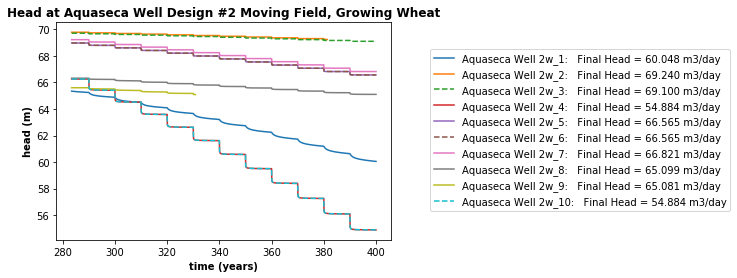

In [202]:
lables_aquaw=['Aquaseca Well 2w_1:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[1][len(time_series_aqua_2w[1])-2][1])} m3/day",
        'Aquaseca Well 2w_2:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[2][len(time_series_aqua_2w[2])-2][1])} m3/day",
        'Aquaseca Well 2w_3:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[3][len(time_series_aqua_2w[3])-2][1])} m3/day",
        'Aquaseca Well 2w_4:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[4][len(time_series_aqua_2w[4])-2][1])} m3/day",
        'Aquaseca Well 2w_5:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[5][len(time_series_aqua_2w[5])-2][1])} m3/day",
        'Aquaseca Well 2w_6:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[6][len(time_series_aqua_2w[6])-2][1])} m3/day",
        'Aquaseca Well 2w_7:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[7][len(time_series_aqua_2w[7])-2][1])} m3/day",
        'Aquaseca Well 2w_8:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[8][len(time_series_aqua_2w[8])-2][1])} m3/day",
        'Aquaseca Well 2w_9:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[9][len(time_series_aqua_2w[9])-2][1])} m3/day",
        'Aquaseca Well 2w_10:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[10][len(time_series_aqua_2w[10])-2][1])} m3/day"]
#create plot of aqua for design 2w - reflection with wheat
#make legend with final heads and parameter values
plt.subplot(1, 1, 1)
ax=plt.gca()
ax.ticklabel_format(useOffset=False)
plt.title("Head at Aquaseca Well Design #2 Moving Field, Growing Wheat",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
plt.plot(time_series_aqua_2w[1][1400:, 0]/360, time_series_aqua_2w[1][1400:, 1]) 
plt.plot(time_series_aqua_2w[2][1400:, 0]/360, time_series_aqua_2w[2][1400:, 1]) 
plt.plot(time_series_aqua_2w[3][1400:, 0]/360, time_series_aqua_2w[3][1400:, 1],'--') 
plt.plot(time_series_aqua_2w[4][1400:, 0]/360, time_series_aqua_2w[4][1400:, 1],) 
plt.plot(time_series_aqua_2w[5][1400:, 0]/360, time_series_aqua_2w[5][1400:, 1]) 
plt.plot(time_series_aqua_2w[6][1400:, 0]/360, time_series_aqua_2w[6][1400:, 1],'--') 
plt.plot(time_series_aqua_2w[7][1400:, 0]/360, time_series_aqua_2w[7][1400:, 1]) 
plt.plot(time_series_aqua_2w[8][1400:, 0]/360, time_series_aqua_2w[8][1400:, 1],) 
plt.plot(time_series_aqua_2w[9][1400:, 0]/360, time_series_aqua_2w[9][1400:, 1],) 
plt.plot(time_series_aqua_2w[10][1400:, 0]/360, time_series_aqua_2w[10][1400:, 1],'--') 

plt.legend(lables_aquaw,bbox_to_anchor=(1.1,.9))

#plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
plt.show()


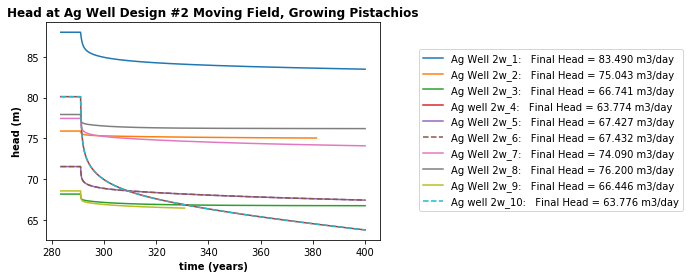

In [177]:
lables_agw=['Ag Well 2w_1:   'f"Final Head = {'%.3f'%(time_series_ag2w[1][len(time_series_ag2w[1])-2][1])} m3/day",
        'Ag Well 2w_2:   'f"Final Head = {'%.3f'%(time_series_ag2w[2][len(time_series_ag2w[2])-2][1])} m3/day",
        'Ag Well 2w_3:   'f"Final Head = {'%.3f'%(time_series_ag2w[3][len(time_series_ag2w[3])-2][1])} m3/day",
        'Ag well 2w_4:   'f"Final Head = {'%.3f'%(time_series_ag2w[4][len(time_series_ag2w[4])-2][1])} m3/day",
        'Ag Well 2w_5:   'f"Final Head = {'%.3f'%(time_series_ag2w[5][len(time_series_ag2w[5])-2][1])} m3/day",
        'Ag Well 2w_6:   'f"Final Head = {'%.3f'%(time_series_ag2w[6][len(time_series_ag2w[6])-2][1])} m3/day",
        'Ag Well 2w_7:   'f"Final Head = {'%.3f'%(time_series_ag2w[7][len(time_series_ag2w[7])-2][1])} m3/day",
        'Ag Well 2w_8:   'f"Final Head = {'%.3f'%(time_series_ag2w[8][len(time_series_ag2w[8])-2][1])} m3/day",
        'Ag Well 2w_9:   'f"Final Head = {'%.3f'%(time_series_ag2w[9][len(time_series_ag2w[9])-2][1])} m3/day",
        'Ag well 2w_10:   'f"Final Head = {'%.3f'%(time_series_ag2w[10][len(time_series_ag2w[10])-2][1])} m3/day"]
#create plot of ag well for design 2w - reflection with pistachios
#make legend with final heads and parameter values
plt.subplot(1, 1, 1)
ax=plt.gca()
ax.ticklabel_format(useOffset=False)
plt.title("Head at Ag Well Design #2 Moving Field, Growing Pistachios",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
plt.plot(time_series_ag2w[1][1400:, 0]/360, time_series_ag2w[1][1400:, 1]) 
plt.plot(time_series_ag2w[2][1400:, 0]/360, time_series_ag2w[2][1400:, 1]) 
plt.plot(time_series_ag2w[3][1400:, 0]/360, time_series_ag2w[3][1400:, 1]) 
plt.plot(time_series_ag2w[4][1400:, 0]/360, time_series_ag2w[4][1400:, 1]) 
plt.plot(time_series_ag2w[5][1400:, 0]/360, time_series_ag2w[5][1400:, 1]) 
plt.plot(time_series_ag2w[6][1400:, 0]/360, time_series_ag2w[6][1400:, 1],'--') 
plt.plot(time_series_ag2w[7][1400:, 0]/360, time_series_ag2w[7][1400:, 1]) 
plt.plot(time_series_ag2w[8][1400:, 0]/360, time_series_ag2w[8][1400:, 1]) 
plt.plot(time_series_ag2w[9][1400:, 0]/360, time_series_ag2w[9][1400:, 1]) 
plt.plot(time_series_ag2w[10][1400:, 0]/360, time_series_ag2w[10][1400:, 1],'--') 

plt.legend(lables_agw,bbox_to_anchor=(1.1,.9))

#plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
plt.show()


# USE ME!

In [ ]:
lables_agp=['Ag Well 2p_1:   'f"Final Head = {'%.3f'%(time_series_ag2p[1][len(time_series_ag2p[1])-2][1])} m3/day",
        'Ag Well 2p_2:   'f"Final Head = {'%.3f'%(time_series_ag2p[2][len(time_series_ag2p[2])-2][1])} m3/day",
        'Ag Well 2p_3:   'f"Final Head = {'%.3f'%(time_series_ag2p[3][len(time_series_ag2p[3])-2][1])} m3/day",
#         'Ag well 2p_4:   'f"Final Head = {'%.3f'%(time_series_ag2p[4][len(time_series_ag2p[4])-2][1])} m3/day",
        'Ag Well 2p_5:   'f"Final Head = {'%.3f'%(time_series_ag2p[5][len(time_series_ag2p[5])-2][1])} m3/day",
        'Ag Well 2p_6:   'f"Final Head = {'%.3f'%(time_series_ag2p[6][len(time_series_ag2p[6])-2][1])} m3/day",
        'Ag Well 2p_7:   'f"Final Head = {'%.3f'%(time_series_ag2p[7][len(time_series_ag2p[7])-2][1])} m3/day",
        'Ag Well 2p_8:   'f"Final Head = {'%.3f'%(time_series_ag2p[8][len(time_series_ag2p[8])-2][1])} m3/day",
        'Ag Well 2p_9:   'f"Final Head = {'%.3f'%(time_series_ag2p[9][len(time_series_ag2p[9])-2][1])} m3/day"]#,
#         'Ag well 2p_10:   'f"Final Head = {'%.3f'%(time_series_ag2p[10][len(time_series_ag2p[10])-2][1])} m3/day"]
#create plot of ag well for design 2p - reflection with pistachios
#make legend with final heads and parameter values
plt.subplot(1, 1, 1)
ax=plt.gca()
ax.ticklabel_format(useOffset=False)
plt.title("Head at Ag Well Design #2 Moving Field, Growing Pistachios",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
plt.plot(time_series_ag2p[1][1400:, 0]/360, time_series_ag2p[1][1400:, 1]) 
plt.plot(time_series_ag2p[2][1400:, 0]/360, time_series_ag2p[2][1400:, 1]) 
plt.plot(time_series_ag2p[3][1400:, 0]/360, time_series_ag2p[3][1400:, 1]) 
# plt.plot(time_series_ag2p[4][1400:, 0]/360, time_series_ag2p[4][1400:, 1]) 
plt.plot(time_series_ag2p[5][1400:, 0]/360, time_series_ag2p[5][1400:, 1],'--') 
plt.plot(time_series_ag2p[6][1400:, 0]/360, time_series_ag2p[6][1400:, 1],'--') 
plt.plot(time_series_ag2p[7][1400:, 0]/360, time_series_ag2p[7][1400:, 1]) 
plt.plot(time_series_ag2p[8][1400:, 0]/360, time_series_ag2p[8][1400:, 1]) 
plt.plot(time_series_ag2p[9][1400:, 0]/360, time_series_ag2p[9][1400:, 1]) 
# plt.plot(time_series_ag2p[10][1400:, 0]/360, time_series_ag2p[10][1400:, 1]) 

plt.legend(lables_agp,bbox_to_anchor=(1.1,.9))

plt.savefig("Head_ag2p_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
plt.show()

lables_agw=['Ag Well 2w_1:   'f"Final Head = {'%.3f'%(time_series_ag2w[1][len(time_series_ag2w[1])-2][1])} m3/day",
        'Ag Well 2w_2:   'f"Final Head = {'%.3f'%(time_series_ag2w[2][len(time_series_ag2w[2])-2][1])} m3/day",
        'Ag Well 2w_3:   'f"Final Head = {'%.3f'%(time_series_ag2w[3][len(time_series_ag2w[3])-2][1])} m3/day",
        'Ag well 2w_4:   'f"Final Head = {'%.3f'%(time_series_ag2w[4][len(time_series_ag2w[4])-2][1])} m3/day",
        'Ag Well 2w_5:   'f"Final Head = {'%.3f'%(time_series_ag2w[5][len(time_series_ag2w[5])-2][1])} m3/day",
        'Ag Well 2w_6:   'f"Final Head = {'%.3f'%(time_series_ag2w[6][len(time_series_ag2w[6])-2][1])} m3/day",
        'Ag Well 2w_7:   'f"Final Head = {'%.3f'%(time_series_ag2w[7][len(time_series_ag2w[7])-2][1])} m3/day",
        'Ag Well 2w_8:   'f"Final Head = {'%.3f'%(time_series_ag2w[8][len(time_series_ag2w[8])-2][1])} m3/day",
        'Ag Well 2w_9:   'f"Final Head = {'%.3f'%(time_series_ag2w[9][len(time_series_ag2w[9])-2][1])} m3/day",
        'Ag well 2w_10:   'f"Final Head = {'%.3f'%(time_series_ag2w[10][len(time_series_ag2w[10])-2][1])} m3/day"]
#create plot of ag well for design 2w - reflection with wheat
#make legend with final heads and parameter values
plt.subplot(1, 1, 1)
ax=plt.gca()
ax.ticklabel_format(useOffset=False)
plt.title("Head at Ag Well Design #2 Moving Field, Growing Wheat",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
plt.plot(time_series_ag2w[1][1400:, 0]/360, time_series_ag2w[1][1400:, 1]) 
plt.plot(time_series_ag2w[2][1400:, 0]/360, time_series_ag2w[2][1400:, 1]) 
plt.plot(time_series_ag2w[3][1400:, 0]/360, time_series_ag2w[3][1400:, 1]) 
plt.plot(time_series_ag2w[4][1400:, 0]/360, time_series_ag2w[4][1400:, 1]) 
plt.plot(time_series_ag2w[5][1400:, 0]/360, time_series_ag2w[5][1400:, 1]) 
plt.plot(time_series_ag2w[6][1400:, 0]/360, time_series_ag2w[6][1400:, 1],'--') 
plt.plot(time_series_ag2w[7][1400:, 0]/360, time_series_ag2w[7][1400:, 1]) 
plt.plot(time_series_ag2w[8][1400:, 0]/360, time_series_ag2w[8][1400:, 1]) 
plt.plot(time_series_ag2w[9][1400:, 0]/360, time_series_ag2w[9][1400:, 1]) 
plt.plot(time_series_ag2w[10][1400:, 0]/360, time_series_ag2w[10][1400:, 1],'--') 

plt.legend(lables_agw,bbox_to_anchor=(1.1,.9))

plt.savefig("Head_ag2w_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
plt.show()

#create plot of MW1 for design 2p - reflection with pistachios
lables_MW1=['MW1 2p_1:   'f"Final Head = {'%.3f'%(time_series_MW1_2p[1][len(time_series_MW1_2p[1])-2][1])} m3/day",
        'MW1 2p_2:   'f"Final Head = {'%.3f'%(time_series_MW1_2p[2][len(time_series_MW1_2p[2])-2][1])} m3/day",
        'MW1 2p_3:   'f"Final Head = {'%.3f'%(time_series_MW1_2p[3][len(time_series_MW1_2p[3])-2][1])} m3/day",
        'MW1 2p_4:   'f"Final Head = {'%.3f'%(time_series_MW1_2p[4][len(time_series_MW1_2p[4])-2][1])} m3/day",
        'MW1 2p_5:   'f"Final Head = {'%.3f'%(time_series_MW1_2p[5][len(time_series_MW1_2p[5])-2][1])} m3/day",
        'MW1 2p_6:   'f"Final Head = {'%.3f'%(time_series_MW1_2p[6][len(time_series_MW1_2p[6])-2][1])} m3/day",
        'MW1 2p_7:   'f"Final Head = {'%.3f'%(time_series_MW1_2p[7][len(time_series_MW1_2p[7])-2][1])} m3/day",
        'MW1 2p_8:   'f"Final Head = {'%.3f'%(time_series_MW1_2p[8][len(time_series_MW1_2p[8])-2][1])} m3/day",
        'MW1 2p_9:   'f"Final Head = {'%.3f'%(time_series_MW1_2p[9][len(time_series_MW1_2p[9])-2][1])} m3/day",
        'MW1 2p_10:   'f"Final Head = {'%.3f'%(time_series_MW1_2p[10][len(time_series_MW1_2p[10])-2][1])} m3/day"]
#create plot of MW1 for design 2p - reflection with pistachios
#make legend with final heads and parameter values
plt.subplot(1, 1, 1)
ax=plt.gca()
ax.ticklabel_format(useOffset=False)
plt.title("Head at MW1 Design #2 Moving Field, Growing Pistachios",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
plt.plot(time_series_MW1_2p[1][1400:, 0]/360, time_series_MW1_2p[1][1400:, 1]) 
plt.plot(time_series_MW1_2p[2][1400:, 0]/360, time_series_MW1_2p[2][1400:, 1]) 
plt.plot(time_series_MW1_2p[3][1400:, 0]/360, time_series_MW1_2p[3][1400:, 1]) 
plt.plot(time_series_MW1_2p[4][1400:, 0]/360, time_series_MW1_2p[4][1400:, 1]) 
plt.plot(time_series_MW1_2p[5][1400:, 0]/360, time_series_MW1_2p[5][1400:, 1]) 
plt.plot(time_series_MW1_2p[6][1400:, 0]/360, time_series_MW1_2p[6][1400:, 1]) 
plt.plot(time_series_MW1_2p[7][1400:, 0]/360, time_series_MW1_2p[7][1400:, 1]) 
plt.plot(time_series_MW1_2p[8][1400:, 0]/360, time_series_MW1_2p[8][1400:, 1]) 
plt.plot(time_series_MW1_2p[9][1400:, 0]/360, time_series_MW1_2p[9][1400:, 1],'--') 
plt.plot(time_series_MW1_2p[10][1400:, 0]/360, time_series_MW1_2p[10][1400:, 1]) 

plt.legend(lables_MW1,bbox_to_anchor=(1.1,.9))

plt.savefig("Head_mw1_2p_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
plt.show()

#create plot of MW1 for design 2w - reflection with wheat
lables_MW1=['MW1 2w_1:   'f"Final Head = {'%.3f'%(time_series_MW1_2w[1][len(time_series_MW1_2w[1])-2][1])} m3/day",
        'MW1 2w_2:   'f"Final Head = {'%.3f'%(time_series_MW1_2w[2][len(time_series_MW1_2w[2])-2][1])} m3/day",
        'MW1 2w_3:   'f"Final Head = {'%.3f'%(time_series_MW1_2w[3][len(time_series_MW1_2w[3])-2][1])} m3/day",
        'MW1 2w_4:   'f"Final Head = {'%.3f'%(time_series_MW1_2w[4][len(time_series_MW1_2w[4])-2][1])} m3/day",
        'MW1 2w_5:   'f"Final Head = {'%.3f'%(time_series_MW1_2w[5][len(time_series_MW1_2w[5])-2][1])} m3/day",
        'MW1 2w_6:   'f"Final Head = {'%.3f'%(time_series_MW1_2w[6][len(time_series_MW1_2w[6])-2][1])} m3/day",
        'MW1 2w_7:   'f"Final Head = {'%.3f'%(time_series_MW1_2w[7][len(time_series_MW1_2w[7])-2][1])} m3/day",
        'MW1 2w_8:   'f"Final Head = {'%.3f'%(time_series_MW1_2w[8][len(time_series_MW1_2w[8])-2][1])} m3/day",
        'MW1 2w_9:   'f"Final Head = {'%.3f'%(time_series_MW1_2w[9][len(time_series_MW1_2w[9])-2][1])} m3/day",
        'MW1 2w_10:   'f"Final Head = {'%.3f'%(time_series_MW1_2w[10][len(time_series_MW1_2w[10])-2][1])} m3/day"]
#create plot of MW1 for design 2w - reflection with Wheat
#make legend with final heads and parameter values
plt.subplot(1, 1, 1)
ax=plt.gca()
ax.ticklabel_format(useOffset=False)
plt.title("Head at MW1 Design #2 Moving Field, Growing Wheat",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
plt.plot(time_series_MW1_2w[1][1400:, 0]/360, time_series_MW1_2w[1][1400:, 1]) 
plt.plot(time_series_MW1_2w[2][1400:, 0]/360, time_series_MW1_2w[2][1400:, 1]) 
plt.plot(time_series_MW1_2w[3][1400:, 0]/360, time_series_MW1_2w[3][1400:, 1]) 
plt.plot(time_series_MW1_2w[4][1400:, 0]/360, time_series_MW1_2w[4][1400:, 1]) 
plt.plot(time_series_MW1_2w[5][1400:, 0]/360, time_series_MW1_2w[5][1400:, 1]) 
plt.plot(time_series_MW1_2w[6][1400:, 0]/360, time_series_MW1_2w[6][1400:, 1]) 
plt.plot(time_series_MW1_2w[7][1400:, 0]/360, time_series_MW1_2w[7][1400:, 1]) 
plt.plot(time_series_MW1_2w[8][1400:, 0]/360, time_series_MW1_2w[8][1400:, 1]) 
plt.plot(time_series_MW1_2w[9][1400:, 0]/360, time_series_MW1_2w[9][1400:, 1],'--') 
plt.plot(time_series_MW1_2w[10][1400:, 0]/360, time_series_MW1_2w[10][1400:, 1]) 

plt.legend(lables_MW1,bbox_to_anchor=(1.1,.9))

plt.savefig("Head_MW1_2w_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
plt.show()

#create plot of AQUA WELL for design 2p - reflection with pistachios
lables_aqua=['Aquaseca Well 2p_1:   'f"Final Head = {'%.3f'%(time_series_aqua_2p[1][len(time_series_aqua_2p[1])-2][1])} m3/day",
        'Aquaseca Well 2p_2:   'f"Final Head = {'%.3f'%(time_series_aqua_2p[2][len(time_series_aqua_2p[2])-2][1])} m3/day",
        'Aquaseca Well 2p_3:   'f"Final Head = {'%.3f'%(time_series_aqua_2p[3][len(time_series_aqua_2p[3])-2][1])} m3/day",
        'Aquaseca Well 2p_4:   'f"Final Head = {'%.3f'%(time_series_aqua_2p[4][len(time_series_aqua_2p[4])-2][1])} m3/day",
        'Aquaseca Well 2p_5:   'f"Final Head = {'%.3f'%(time_series_aqua_2p[5][len(time_series_aqua_2p[5])-2][1])} m3/day",
        'Aquaseca Well 2p_6:   'f"Final Head = {'%.3f'%(time_series_aqua_2p[6][len(time_series_aqua_2p[6])-2][1])} m3/day",
        'Aquaseca Well 2p_7:   'f"Final Head = {'%.3f'%(time_series_aqua_2p[7][len(time_series_aqua_2p[7])-2][1])} m3/day",
        'Aquaseca Well 2p_8:   'f"Final Head = {'%.3f'%(time_series_aqua_2p[8][len(time_series_aqua_2p[8])-2][1])} m3/day",
        'Aquaseca Well 2p_9:   'f"Final Head = {'%.3f'%(time_series_aqua_2p[9][len(time_series_aqua_2p[9])-2][1])} m3/day",
        'Aquaseca Well 2p_10:   'f"Final Head = {'%.3f'%(time_series_aqua_2p[10][len(time_series_aqua_2p[10])-2][1])} m3/day"]
#create plot of aqua for design 2p - reflection with pistachios
#make legend with final heads and parameter values
plt.subplot(1, 1, 1)
ax=plt.gca()
ax.ticklabel_format(useOffset=False)
plt.title("Head at Aquaseca Well Design #2 Moving Field, Growing Pistachios",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
plt.plot(time_series_aqua_2p[1][1400:, 0]/360, time_series_aqua_2p[1][1400:, 1]) 
plt.plot(time_series_aqua_2p[2][1400:, 0]/360, time_series_aqua_2p[2][1400:, 1]) 
plt.plot(time_series_aqua_2p[3][1400:, 0]/360, time_series_aqua_2p[3][1400:, 1],'--') 
plt.plot(time_series_aqua_2p[4][1400:, 0]/360, time_series_aqua_2p[4][1400:, 1],) 
plt.plot(time_series_aqua_2p[5][1400:, 0]/360, time_series_aqua_2p[5][1400:, 1]) 
plt.plot(time_series_aqua_2p[6][1400:, 0]/360, time_series_aqua_2p[6][1400:, 1],'--') 
plt.plot(time_series_aqua_2p[7][1400:, 0]/360, time_series_aqua_2p[7][1400:, 1]) 
plt.plot(time_series_aqua_2p[8][1400:, 0]/360, time_series_aqua_2p[8][1400:, 1],) 
plt.plot(time_series_aqua_2p[9][1400:, 0]/360, time_series_aqua_2p[9][1400:, 1],) 
plt.plot(time_series_aqua_2p[10][1400:, 0]/360, time_series_aqua_2p[10][1400:, 1],'--') 

plt.legend(lables_aqua,bbox_to_anchor=(1.1,.9))

plt.savefig("Head_aqua_2p_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
plt.show()

lables_aquaw=['Aquaseca Well 2w_1:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[1][len(time_series_aqua_2w[1])-2][1])} m3/day",
        'Aquaseca Well 2w_2:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[2][len(time_series_aqua_2w[2])-2][1])} m3/day",
        'Aquaseca Well 2w_3:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[3][len(time_series_aqua_2w[3])-2][1])} m3/day",
        'Aquaseca Well 2w_4:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[4][len(time_series_aqua_2w[4])-2][1])} m3/day",
        'Aquaseca Well 2w_5:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[5][len(time_series_aqua_2w[5])-2][1])} m3/day",
        'Aquaseca Well 2w_6:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[6][len(time_series_aqua_2w[6])-2][1])} m3/day",
        'Aquaseca Well 2w_7:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[7][len(time_series_aqua_2w[7])-2][1])} m3/day",
        'Aquaseca Well 2w_8:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[8][len(time_series_aqua_2w[8])-2][1])} m3/day",
        'Aquaseca Well 2w_9:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[9][len(time_series_aqua_2w[9])-2][1])} m3/day",
        'Aquaseca Well 2w_10:   'f"Final Head = {'%.3f'%(time_series_aqua_2w[10][len(time_series_aqua_2w[10])-2][1])} m3/day"]

#create plot of aqua for design 2w - reflection with wheat
#make legend with final heads and parameter values
plt.subplot(1, 1, 1)
ax=plt.gca()
ax.ticklabel_format(useOffset=False)
plt.title("Head at Aquaseca Well Design #2 Moving Field, Growing Wheat",fontweight='bold')
plt.xlabel('time (years)',fontweight='bold')
plt.ylabel('head (m)',fontweight='bold')
plt.plot(time_series_aqua_2w[1][1400:, 0]/360, time_series_aqua_2w[1][1400:, 1]) 
plt.plot(time_series_aqua_2w[2][1400:, 0]/360, time_series_aqua_2w[2][1400:, 1]) 
plt.plot(time_series_aqua_2w[3][1400:, 0]/360, time_series_aqua_2w[3][1400:, 1],'--') 
plt.plot(time_series_aqua_2w[4][1400:, 0]/360, time_series_aqua_2w[4][1400:, 1],) 
plt.plot(time_series_aqua_2w[5][1400:, 0]/360, time_series_aqua_2w[5][1400:, 1]) 
plt.plot(time_series_aqua_2w[6][1400:, 0]/360, time_series_aqua_2w[6][1400:, 1],'--') 
plt.plot(time_series_aqua_2w[7][1400:, 0]/360, time_series_aqua_2w[7][1400:, 1]) 
plt.plot(time_series_aqua_2w[8][1400:, 0]/360, time_series_aqua_2w[8][1400:, 1],) 
plt.plot(time_series_aqua_2w[9][1400:, 0]/360, time_series_aqua_2w[9][1400:, 1],) 
plt.plot(time_series_aqua_2w[10][1400:, 0]/360, time_series_aqua_2w[10][1400:, 1],'--') 

plt.legend(lables_aquaw,bbox_to_anchor=(1.1,.9))

plt.savefig("Head_aqua_2w_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
plt.show()


### Leakage

In [9]:
modelname = 'Advocacy2p_'+ str(x)
budgobj = flopy.utils.binaryfile.CellBudgetFile(modelname+'.cbc')
leakage = budgobj.get_data(text='RIVER LEAKAGE')
leak=leakage[len(leakage)-2] #time step with positive ET
tot_leak = sum(leak.q)


In [10]:
print(tot_leak)

1200.0


## Import pickles from model runs

In [11]:
# with open('HEAD_Advocacyp.pickle', 'rb') as f:
#     HEAD_advp=pickle.load(f)

# with open('STORAGE_Advocacyp.pickle', 'rb') as f:
#     STORAGE_advp=pickle.load(f)

# with open('LEAKAGE_Advocacyp.pickle', 'rb') as f:
#     LEAKAGE_advp=pickle.load(f)

# with open('ET_DATA_Advocacyp.pickle', 'rb') as f:
#     ET_DATA_advp=pickle.load(f)

# with open('FRF_Advocacyp.pickle', 'rb') as f:
#     FRF_advp=pickle.load(f)

# with open('FFF_Advocacyp.pickle', 'rb') as f:
#     FFF_advp=pickle.load(f)

# with open('RECHARGE_DATA_Advocacyp.pickle', 'rb') as f:
#     RECHARGE_DATA_advp=pickle.load(f)

# with open('ET_TIME_SERIES_Advocacyp.pickle', 'rb') as f:
#     ET_TIME_SERIES_advp=pickle.load(f)

# with open('TIME_SERIES_Advocacyp.pickle', 'rb') as f:
#     TIME_SERIES_advp=pickle.load(f)

# with open('STORAGE_SERIES_Advocacyp.pickle', 'rb') as f:
#     STORAGE_SERIES_advp=pickle.load(f)

# with open('RECHARGE_Advocacyp.pickle', 'rb') as f:
#     RECHARGE_advp=pickle.load(f)


In [12]:
# with open('HEAD_Advocacyw.pickle', 'rb') as f:
#     HEAD_advw=pickle.load(f)

# with open('STORAGE_Advocacyw.pickle', 'rb') as f:
#     STORAGE_advw=pickle.load(f)

# with open('LEAKAGE_Advocacyw.pickle', 'rb') as f:
#     LEAKAGE_advw=pickle.load(f)

# with open('ET_DATA_Advocacyw.pickle', 'rb') as f:
#     ET_DATA_advw=pickle.load(f)

# with open('FRF_Advocacyw.pickle', 'rb') as f:
#     FRF_advw=pickle.load(f)

# with open('FFF_Advocacyw.pickle', 'rb') as f:
#     FFF_advw=pickle.load(f)

# with open('RECHARGE_DATA_Advocacyw.pickle', 'rb') as f:
#     RECHARGE_DATA_advw=pickle.load(f)

# with open('ET_TIME_SERIES_Advocacyw.pickle', 'rb') as f:
#     ET_TIME_SERIES_advw=pickle.load(f)

# with open('TIME_SERIES_Advocacyw.pickle', 'rb') as f:
#     TIME_SERIES_advw=pickle.load(f)

# with open('STORAGE_SERIES_Advocacyw.pickle', 'rb') as f:
#     STORAGE_SERIES_advw=pickle.load(f)

# with open('RECHARGE_Advocacyw.pickle', 'rb') as f:
#     RECHARGE_advw=pickle.load(f)


In [13]:
# with open('HEAD_Advocacyp.pickle', 'rb') as f:
#     HEAD_advp=pickle.load(f)

# with open('STORAGE_Advocacyp.pickle', 'rb') as f:
#     STORAGE_advp=pickle.load(f)

# with open('LEAKAGE_Advocacyp.pickle', 'rb') as f:
#     LEAKAGE_advp=pickle.load(f)

# with open('ET_DATA_Advocacyp.pickle', 'rb') as f:
#     ET_DATA_advp=pickle.load(f)

# with open('FRF_Advocacyp.pickle', 'rb') as f:
#     FRF_advp=pickle.load(f)

# with open('FFF_Advocacyp.pickle', 'rb') as f:
#     FFF_advp=pickle.load(f)

# with open('RECHARGE_DATA_Advocacyp.pickle', 'rb') as f:
#     RECHARGE_DATA_advp=pickle.load(f)

# with open('ET_TIME_SERIES_Advocacyp.pickle', 'rb') as f:
#     ET_TIME_SERIES_advp=pickle.load(f)

# with open('TIME_SERIES_Advocacyp.pickle', 'rb') as f:
#     TIME_SERIES_advp=pickle.load(f)

# with open('STORAGE_SERIES_Advocacyp.pickle', 'rb') as f:
#     STORAGE_SERIES_advp=pickle.load(f)

# with open('RECHARGE_Advocacyp.pickle', 'rb') as f:
#     RECHARGE_advp=pickle.load(f)


In [14]:
# with open('HEAD_Advocacyp.pickle', 'rb') as f:
#     HEAD_advp=pickle.load(f)

# with open('STORAGE_Advocacyp.pickle', 'rb') as f:
#     STORAGE_advp=pickle.load(f)

# with open('LEAKAGE_Advocacyp.pickle', 'rb') as f:
#     LEAKAGE_advp=pickle.load(f)

# with open('ET_DATA_Advocacyp.pickle', 'rb') as f:
#     ET_DATA_advp=pickle.load(f)

# with open('FRF_Advocacyp.pickle', 'rb') as f:
#     FRF_advp=pickle.load(f)

# with open('FFF_Advocacyp.pickle', 'rb') as f:
#     FFF_advp=pickle.load(f)

# with open('RECHARGE_DATA_Advocacyp.pickle', 'rb') as f:
#     RECHARGE_DATA_advp=pickle.load(f)

# with open('ET_TIME_SERIES_Advocacyp.pickle', 'rb') as f:
#     ET_TIME_SERIES_advp=pickle.load(f)

# with open('TIME_SERIES_Advocacyp.pickle', 'rb') as f:
#     TIME_SERIES_advp=pickle.load(f)

# with open('STORAGE_SERIES_Advocacyp.pickle', 'rb') as f:
#     STORAGE_SERIES_advp=pickle.load(f)

# with open('RECHARGE_Advocacyp.pickle', 'rb') as f:
#     RECHARGE_advp=pickle.load(f)


In [15]:
# with open('HEAD_Advocacyp.pickle', 'rb') as f:
#     HEAD_advp=pickle.load(f)

# with open('STORAGE_Advocacyp.pickle', 'rb') as f:
#     STORAGE_advp=pickle.load(f)

# with open('LEAKAGE_Advocacyp.pickle', 'rb') as f:
#     LEAKAGE_advp=pickle.load(f)

# with open('ET_DATA_Advocacyp.pickle', 'rb') as f:
#     ET_DATA_advp=pickle.load(f)

# with open('FRF_Advocacyp.pickle', 'rb') as f:
#     FRF_advp=pickle.load(f)

# with open('FFF_Advocacyp.pickle', 'rb') as f:
#     FFF_advp=pickle.load(f)

# with open('RECHARGE_DATA_Advocacyp.pickle', 'rb') as f:
#     RECHARGE_DATA_advp=pickle.load(f)

# with open('ET_TIME_SERIES_Advocacyp.pickle', 'rb') as f:
#     ET_TIME_SERIES_advp=pickle.load(f)

# with open('TIME_SERIES_Advocacyp.pickle', 'rb') as f:
#     TIME_SERIES_advp=pickle.load(f)

# with open('STORAGE_SERIES_Advocacyp.pickle', 'rb') as f:
#     STORAGE_SERIES_advp=pickle.load(f)

# with open('RECHARGE_Advocacyp.pickle', 'rb') as f:
#     RECHARGE_advp=pickle.load(f)


In [16]:
# with open('HEAD_Advocacyp.pickle', 'rb') as f:
#     HEAD_advp=pickle.load(f)

# with open('STORAGE_Advocacyp.pickle', 'rb') as f:
#     STORAGE_advp=pickle.load(f)

# with open('LEAKAGE_Advocacyp.pickle', 'rb') as f:
#     LEAKAGE_advp=pickle.load(f)

# with open('ET_DATA_Advocacyp.pickle', 'rb') as f:
#     ET_DATA_advp=pickle.load(f)

# with open('FRF_Advocacyp.pickle', 'rb') as f:
#     FRF_advp=pickle.load(f)

# with open('FFF_Advocacyp.pickle', 'rb') as f:
#     FFF_advp=pickle.load(f)

# with open('RECHARGE_DATA_Advocacyp.pickle', 'rb') as f:
#     RECHARGE_DATA_advp=pickle.load(f)

# with open('ET_TIME_SERIES_Advocacyp.pickle', 'rb') as f:
#     ET_TIME_SERIES_advp=pickle.load(f)

# with open('TIME_SERIES_Advocacyp.pickle', 'rb') as f:
#     TIME_SERIES_advp=pickle.load(f)

# with open('STORAGE_SERIES_Advocacyp.pickle', 'rb') as f:
#     STORAGE_SERIES_advp=pickle.load(f)

# with open('RECHARGE_Advocacyp.pickle', 'rb') as f:
#     RECHARGE_advp=pickle.load(f)


In [17]:
# with open('HEAD_Advocacyw.pickle', 'rb') as f:
#     HEAD_advw=pickle.load(f)

# with open('storage_Advocacyw.pickle', 'rb') as f:
#     STORAGE_advw=pickle.load(f)

# with open('leakage_Advocacyw.pickle', 'rb') as f:
#     LEAKAGE_advw=pickle.load(f)

# with open('ET_Data_Advocacyw.pickle', 'rb') as f:
#     ET_DATA_advw=pickle.load(f)

# with open('frf_Advocacyw.pickle', 'rb') as f:
#     FRF_advw=pickle.load(f)

# with open('fff_Advocacyw.pickle', 'rb') as f:
#     FFF_advw=pickle.load(f)

# with open('Recharge_data_Advocacyw.pickle', 'rb') as f:
#     RECHARGE_DATA_advw=pickle.load(f)

# with open('ET_TIME_SERIES_Advocacyw.pickle', 'rb') as f:
#     ET_TIME_SERIES_advw=pickle.load(f)

# with open('TIME_SERIES_Advocacyw.pickle', 'rb') as f:
#     TIME_SERIES_advw=pickle.load(f)

# with open('storage_series_Advocacyw.pickle', 'rb') as f:
#     STORAGE_SERIES_advw=pickle.load(f)

# with open('recharge_Advocacyw.pickle', 'rb') as f:
#     RECHARGE_advw=pickle.load(f)


In [18]:
# with open('HEAD_Advocacy1p.pickle', 'rb') as f:
#     HEAD_adv1p=pickle.load(f)

# with open('storage_Advocacy1p.pickle', 'rb') as f:
#     STORAGE_adv1p=pickle.load(f)

# with open('leakage_Advocacy1p.pickle', 'rb') as f:
#     LEAKAGE_adv1p=pickle.load(f)

# with open('ET_Data_Advocacy1p.pickle', 'rb') as f:
#     ET_DATA_adv1p=pickle.load(f)

# with open('frf_Advocacy1p.pickle', 'rb') as f:
#     FRF_adv1p=pickle.load(f)

# with open('fff_Advocacy1p.pickle', 'rb') as f:
#     FFF_adv1p=pickle.load(f)

# with open('Recharge_data_Advocacy1p.pickle', 'rb') as f:
#     RECHARGE_DATA_adv1p=pickle.load(f)

# with open('ET_TIME_SERIES_Advocacy1p.pickle', 'rb') as f:
#     ET_TIME_SERIES_adv1p=pickle.load(f)

# with open('TIME_SERIES_Advocacy1p.pickle', 'rb') as f:
#     TIME_SERIES_adv1p=pickle.load(f)

# with open('storage_series_Advocacy1p.pickle', 'rb') as f:
#     STORAGE_SERIES_adv1p=pickle.load(f)

# with open('recharge_Advocacy1p.pickle', 'rb') as f:
#     RECHARGE_adv1p=pickle.load(f)


In [19]:
# with open('HEAD_Advocacy1w.pickle', 'rb') as f:
#     HEAD_adv1w=pickle.load(f)

# with open('storage_Advocacy1w.pickle', 'rb') as f:
#     STORAGE_adv1w=pickle.load(f)

# with open('leakage_Advocacy1w.pickle', 'rb') as f:
#     LEAKAGE_adv1w=pickle.load(f)

# with open('ET_Data_Advocacy1w.pickle', 'rb') as f:
#     ET_DATA_adv1w=pickle.load(f)

# with open('frf_Advocacy1w.pickle', 'rb') as f:
#     FRF_adv1w=pickle.load(f)

# with open('fff_Advocacy1w.pickle', 'rb') as f:
#     FFF_adv1w=pickle.load(f)

# with open('Recharge_data_Advocacy1w.pickle', 'rb') as f:
#     RECHARGE_DATA_adv1w=pickle.load(f)

# with open('ET_TIME_SERIES_Advocacy1w.pickle', 'rb') as f:
#     ET_TIME_SERIES_adv1w=pickle.load(f)

# with open('TIME_SERIES_Advocacy1w.pickle', 'rb') as f:
#     TIME_SERIES_adv1w=pickle.load(f)

# with open('storage_series_Advocacy1w.pickle', 'rb') as f:
#     STORAGE_SERIES_adv1w=pickle.load(f)

# with open('recharge_Advocacy1w.pickle', 'rb') as f:
#     RECHARGE_adv1w=pickle.load(f)


In [20]:
# with open('HEAD_Advocacy2p.pickle', 'rb') as f:
#     HEAD_adv2p=pickle.load(f)

# with open('storage_Advocacy2p.pickle', 'rb') as f:
#     STORAGE_adv2p=pickle.load(f)

# with open('leakage_Advocacy2p.pickle', 'rb') as f:
#     LEAKAGE_adv2p=pickle.load(f)

# with open('ET_Data_Advocacy2p.pickle', 'rb') as f:
#     ET_DATA_adv2p=pickle.load(f)

# with open('frf_Advocacy2p.pickle', 'rb') as f:
#     FRF_adv2p=pickle.load(f)

# with open('fff_Advocacy2p.pickle', 'rb') as f:
#     FFF_adv2p=pickle.load(f)

# with open('Recharge_data_Advocacy2p.pickle', 'rb') as f:
#     RECHARGE_DATA_adv2p=pickle.load(f)

# with open('ET_TIME_SERIES_Advocacy2p.pickle', 'rb') as f:
#     ET_TIME_SERIES_adv2p=pickle.load(f)

# with open('TIME_SERIES_Advocacy2p.pickle', 'rb') as f:
#     TIME_SERIES_adv2p=pickle.load(f)

# with open('storage_series_Advocacy2p.pickle', 'rb') as f:
#     STORAGE_SERIES_adv2p=pickle.load(f)

# with open('recharge_Advocacy2p.pickle', 'rb') as f:
#     RECHARGE_adv2p=pickle.load(f)


In [21]:
# with open('HEAD_Advocacy2w.pickle', 'rb') as f:
#     HEAD_adv2w=pickle.load(f)

# with open('storage_Advocacy2w.pickle', 'rb') as f:
#     STORAGE_adv2w=pickle.load(f)

# with open('leakage_Advocacy2w.pickle', 'rb') as f:
#     LEAKAGE_adv2w=pickle.load(f)

# with open('ET_Data_Advocacy2w.pickle', 'rb') as f:
#     ET_DATA_adv2w=pickle.load(f)

# with open('frf_Advocacy2w.pickle', 'rb') as f:
#     FRF_adv2w=pickle.load(f)

# with open('fff_Advocacy2w.pickle', 'rb') as f:
#     FFF_adv2w=pickle.load(f)

# with open('Recharge_data_Advocacy2w.pickle', 'rb') as f:
#     RECHARGE_DATA_adv2w=pickle.load(f)

# with open('ET_TIME_SERIES_Advocacy2w.pickle', 'rb') as f:
#     ET_TIME_SERIES_adv2w=pickle.load(f)

# with open('TIME_SERIES_Advocacy2w.pickle', 'rb') as f:
#     TIME_SERIES_adv2w=pickle.load(f)

# with open('storage_series_Advocacy2w.pickle', 'rb') as f:
#     STORAGE_SERIES_adv2w=pickle.load(f)

# with open('recharge_Advocacy2w.pickle', 'rb') as f:
#     RECHARGE_adv2w=pickle.load(f)


### Making the Head plot

In [22]:
##old head plotting script for reference

#Read in files from the run 
    
#     hds = bf.HeadFile(modelname+'.hds')                   # reads the binary head file
#     times = hds.get_times()                               # returns a list of timesteps

#     #extract binary data from head file
#     head = {} #create dictionary to store head data 
#     frf = {} #create dictionary to store flows through right cell face 
#     fff = {} #create dictionary to store flows through front cell face 
#     storage = {} #create dictionary to store storage
#     ET = {}

#     headobj = flopy.utils.binaryfile.HeadFile(modelname+'.hds') #get head data as python object
#     budgobj = flopy.utils.binaryfile.CellBudgetFile(modelname+'.cbc') #get flow data as python object

#     #get data from python objects
#     for stress_per, time in enumerate(times): #iterate through times at end of each stress period
#         head['sp%s'%(stress_per)] = headobj.get_data() #append heads to head list for ea stress per
#         frf['sp%s'%(stress_per)] = budgobj.get_data(text='FLOW RIGHT FACE',totim=time) 
#         fff['sp%s'%(stress_per)] = budgobj.get_data(text='FLOW FRONT FACE',totim=time) #append front face flow to fff list for ea stress per
#         storage['sp%s'%(stress_per)] = budgobj.get_data(text='STORAGE',totim=time)
#         ET['sp%s'%(stress_per)] = budgobj.get_data(text='STORAGE',totim=time)
        
#     #Plot head at monitoring wells 
#     #get time series for a certain cell

#     cell_id1 = (0,25,24) #cell ID of MW1
#     cell_id2 = (0,37,12) #cell ID of MW2
#     ag_id = (0,38,12)#cell ID of ag well
#     agua_id = (2,29,37) #Cell ID of aguaseca community well

#     time_series1 = headobj.get_ts(cell_id1) #get the time series at MW1
#     time_series2 = headobj.get_ts(cell_id2) #get the time series at MW2
#     time_series_ag = headobj.get_ts(ag_id) #get the time series at ag well
#     time_series_agua = headobj.get_ts(agua_id) #get the time series at agua seca com well
    
    
#     #create plot of MW1
#     plt.subplot(1, 1, 1)
#     ax=plt.gca()
#     ax.ticklabel_format(useOffset=False)
#     plt.title("Head at Monitoring Well #1 " + str(modelname),fontweight='bold')
#     plt.xlabel('time (years)\n'f"Starting Head = {head['sp%s'%(0)][0,38,12]} m\n"
#                f"Final Head = {head['sp%s'%(len(head)-1)][0, 25, 24]} m",fontweight='bold')
#     plt.ylabel('head (m)',fontweight='bold')
#     plt.plot(time_series1[:, 0]/360, time_series1[:, 1], 'b-') #plot the time series with points at each record
#     plt.savefig("Head_M1_"+str(modelname)+".png",dpi=600,bbox_inches='tight')
#     plt.show()

